In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import timeit
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

In [2]:
# LOAD DATA POINT COORDINATE
point_input = pd.read_csv("../../07_Generate_DatasetRandom/BP_input.txt", header=None, sep='\s+')
point_target = pd.read_csv("../../07_Generate_DatasetRandom/BP_target.txt", header=None, sep='\s+')

In [3]:
# LOAD DATA X & Y DOMAIN RECTANGLE

def load_data(main_path, num_directory, delta_times, num_point):
    
    # Load and normalisasi data X
    data = []
    for i in range(1, num_directory+1):
        load_input = pd.read_csv("%s/%s/DATA_INPUT.txt" % (main_path, str(i)), skiprows=7, header=None, sep='\s+')
        #print(load_input)
        data_input = []
        for j in range(num_point):
            X_target = load_input[[0,1]].values
            X_target = pd.DataFrame(X_target.reshape(4, -1, order='F')[j].reshape(-1, 2, order='F'))
            #print(X_target)
            time = X_target[0]
            X_target = X_target[1]
            #print(X_target)
            d = {'data': X_target}
            df = pd.DataFrame(data=d).replace(np.nan, 0)
            df = df[:delta_times].values.T
            #print(df)
            data_input.append(df)
        data_input = np.array(data_input).reshape(1, num_point, -1)
        data.append(data_input)
    data = np.array(data)
    #print(data)
    X = []
    for i in range(num_directory):
        X.append(data[i].T)
    X = np.array(X).reshape(-1, delta_times, num_point)
    #print(X)
    
    # Load and normalisasi data Y
    Y = []
    for i in range(1, num_directory+1):
        load_target = pd.read_csv("%s/%s/DATA_TARGET.txt" % (main_path, str(i)), skiprows=7, header=None, sep='\s+')
        load_target = load_target[[0,1]]
        #print(load_target)
        data_target = load_target[1].values.reshape(714,-1,order='F').T
        #print(data_target)
        Y_target = data_target[0]
        #print(Y_target)
        Y.append([Y_target])
    Y = np.array(Y).reshape(-1, 714)
    
    
    return X, Y

In [4]:
path_data_random = '../../07_Generate_DatasetRandom'
path_data_val = '../../06_GenerateVal'
X_train, Y_train = load_data(path_data_random, 100, 20, 4)
X_val, Y_val = load_data(path_data_val, 10, 20, 4)
#print(Y_train.shape)

In [5]:
# MODEL ML

def model_RNN(X,Y):
    start = timeit.default_timer() #start time calculation

    #model LSTM
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.SimpleRNN(1536, activation= 'tanh', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
    model.add(tf.keras.layers.SimpleRNN(896, activation= 'tanh', return_sequences=False))
    model.add(tf.keras.layers.Dense(Y.shape[1], activation= 'tanh'))

    #model learning rate using Adam optimization
    optimizer = tf.keras.optimizers.Adam(1e-3)

    #model loss calculation using mse
    model.compile(loss="mse", optimizer=optimizer)

    #model number of train 1000 epochs with batch size 32
    model.fit(X,Y, epochs=1000, shuffle=False, batch_size=32)

    stop = timeit.default_timer() #end time calculation

    time = stop - start #time calculation
    
    return model, time

def model_LSTM(X,Y):
    start = timeit.default_timer() #start time calculation

    #model LSTM
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(1536, activation= 'tanh', recurrent_activation='sigmoid', return_sequences=True, 
                                   input_shape=(X.shape[1],X.shape[2])))
    model.add(tf.keras.layers.LSTM(896, activation= 'tanh', recurrent_activation='sigmoid', return_sequences=False))
    model.add(tf.keras.layers.Dense(Y.shape[1], activation='tanh'))

    #model learning rate using Adam optimization
    optimizer = tf.keras.optimizers.Adam(1e-3)

    #model loss calculation using mse
    model.compile(loss="mse", optimizer=optimizer)

    #model number of train 1000 epochs with batch size 32
    model.fit(X,Y, epochs=1000, shuffle=False, batch_size=32)

    stop = timeit.default_timer() #end time calculation

    time = stop - start #time calculation
    
    return model, time

In [6]:
# TRAINING DATA USING MODEL RNN

model, time = model_RNN(X_train, Y_train)
print(time)

Epoch 1/1000
4/4 [==============================] - 2s 379ms/step - loss: 0.0448
Epoch 2/1000
4/4 [==============================] - 1s 374ms/step - loss: 0.0334
Epoch 3/1000
4/4 [==============================] - 2s 406ms/step - loss: 0.0256
Epoch 4/1000
4/4 [==============================] - 1s 368ms/step - loss: 0.0165
Epoch 5/1000
4/4 [==============================] - 2s 391ms/step - loss: 0.0122
Epoch 6/1000
4/4 [==============================] - 2s 403ms/step - loss: 0.0099
Epoch 7/1000
4/4 [==============================] - 2s 402ms/step - loss: 0.0082
Epoch 8/1000
4/4 [==============================] - 2s 399ms/step - loss: 0.0070
Epoch 9/1000
4/4 [==============================] - 2s 381ms/step - loss: 0.0060
Epoch 10/1000
4/4 [==============================] - 2s 424ms/step - loss: 0.0058
Epoch 11/1000
4/4 [==============================] - 2s 389ms/step - loss: 0.0055
Epoch 12/1000
4/4 [==============================] - 2s 386ms/step - loss: 0.0052
Epoch 13/1000
4/4 [======

4/4 [==============================] - 2s 380ms/step - loss: 0.0025
Epoch 102/1000
4/4 [==============================] - 2s 404ms/step - loss: 0.0025
Epoch 103/1000
4/4 [==============================] - 2s 434ms/step - loss: 0.0025
Epoch 104/1000
4/4 [==============================] - 2s 395ms/step - loss: 0.0025
Epoch 105/1000
4/4 [==============================] - 2s 388ms/step - loss: 0.0027
Epoch 106/1000
4/4 [==============================] - 2s 420ms/step - loss: 0.0028
Epoch 107/1000
4/4 [==============================] - 2s 392ms/step - loss: 0.0029
Epoch 108/1000
4/4 [==============================] - 2s 382ms/step - loss: 0.0028
Epoch 109/1000
4/4 [==============================] - 2s 401ms/step - loss: 0.0030
Epoch 110/1000
4/4 [==============================] - 2s 431ms/step - loss: 0.0030
Epoch 111/1000
4/4 [==============================] - 2s 399ms/step - loss: 0.0027
Epoch 112/1000
4/4 [==============================] - 2s 395ms/step - loss: 0.0025
Epoch 113/1000
4/4 

4/4 [==============================] - 2s 623ms/step - loss: 0.0032
Epoch 200/1000
4/4 [==============================] - 3s 738ms/step - loss: 0.0029
Epoch 201/1000
4/4 [==============================] - 2s 578ms/step - loss: 0.0027
Epoch 202/1000
4/4 [==============================] - 3s 639ms/step - loss: 0.0030
Epoch 203/1000
4/4 [==============================] - 2s 577ms/step - loss: 0.0031
Epoch 204/1000
4/4 [==============================] - 3s 626ms/step - loss: 0.0029
Epoch 205/1000
4/4 [==============================] - 3s 650ms/step - loss: 0.0025
Epoch 206/1000
4/4 [==============================] - 3s 650ms/step - loss: 0.0025
Epoch 207/1000
4/4 [==============================] - 2s 602ms/step - loss: 0.0025
Epoch 208/1000
4/4 [==============================] - 3s 666ms/step - loss: 0.0025
Epoch 209/1000
4/4 [==============================] - 3s 635ms/step - loss: 0.0024
Epoch 210/1000
4/4 [==============================] - 3s 655ms/step - loss: 0.0024
Epoch 211/1000
4/4 

4/4 [==============================] - 3s 636ms/step - loss: 0.0027
Epoch 298/1000
4/4 [==============================] - 2s 610ms/step - loss: 0.0028
Epoch 299/1000
4/4 [==============================] - 2s 570ms/step - loss: 0.0028
Epoch 300/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0030
Epoch 301/1000
4/4 [==============================] - 3s 657ms/step - loss: 0.0027
Epoch 302/1000
4/4 [==============================] - 3s 663ms/step - loss: 0.0028
Epoch 303/1000
4/4 [==============================] - 2s 614ms/step - loss: 0.0027
Epoch 304/1000
4/4 [==============================] - 2s 619ms/step - loss: 0.0032
Epoch 305/1000
4/4 [==============================] - 3s 656ms/step - loss: 0.0028
Epoch 306/1000
4/4 [==============================] - 3s 647ms/step - loss: 0.0027
Epoch 307/1000
4/4 [==============================] - 3s 673ms/step - loss: 0.0026
Epoch 308/1000
4/4 [==============================] - 2s 613ms/step - loss: 0.0026
Epoch 309/1000
4/4 

4/4 [==============================] - 3s 681ms/step - loss: 0.0022
Epoch 396/1000
4/4 [==============================] - 3s 690ms/step - loss: 0.0022
Epoch 397/1000
4/4 [==============================] - 3s 699ms/step - loss: 0.0023
Epoch 398/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0023
Epoch 399/1000
4/4 [==============================] - 3s 743ms/step - loss: 0.0022
Epoch 400/1000
4/4 [==============================] - 2s 621ms/step - loss: 0.0022
Epoch 401/1000
4/4 [==============================] - 2s 621ms/step - loss: 0.0023
Epoch 402/1000
4/4 [==============================] - 2s 575ms/step - loss: 0.0022
Epoch 403/1000
4/4 [==============================] - 3s 727ms/step - loss: 0.0022
Epoch 404/1000
4/4 [==============================] - 3s 648ms/step - loss: 0.0022
Epoch 405/1000
4/4 [==============================] - 3s 631ms/step - loss: 0.0025
Epoch 406/1000
4/4 [==============================] - 2s 601ms/step - loss: 0.0024
Epoch 407/1000
4/4 

4/4 [==============================] - 2s 557ms/step - loss: 0.0022
Epoch 494/1000
4/4 [==============================] - 2s 603ms/step - loss: 0.0022
Epoch 495/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0022
Epoch 496/1000
4/4 [==============================] - 2s 583ms/step - loss: 0.0022
Epoch 497/1000
4/4 [==============================] - 2s 586ms/step - loss: 0.0022
Epoch 498/1000
4/4 [==============================] - 2s 581ms/step - loss: 0.0024
Epoch 499/1000
4/4 [==============================] - 2s 622ms/step - loss: 0.0024
Epoch 500/1000
4/4 [==============================] - 2s 598ms/step - loss: 0.0023
Epoch 501/1000
4/4 [==============================] - 2s 565ms/step - loss: 0.0022
Epoch 502/1000
4/4 [==============================] - 2s 547ms/step - loss: 0.0021
Epoch 503/1000
4/4 [==============================] - 3s 649ms/step - loss: 0.0020
Epoch 504/1000
4/4 [==============================] - 2s 598ms/step - loss: 0.0021
Epoch 505/1000
4/4 

4/4 [==============================] - 3s 633ms/step - loss: 0.0020
Epoch 592/1000
4/4 [==============================] - 3s 626ms/step - loss: 0.0021
Epoch 593/1000
4/4 [==============================] - 2s 605ms/step - loss: 0.0021
Epoch 594/1000
4/4 [==============================] - 2s 601ms/step - loss: 0.0019
Epoch 595/1000
4/4 [==============================] - 3s 678ms/step - loss: 0.0019
Epoch 596/1000
4/4 [==============================] - 2s 615ms/step - loss: 0.0018
Epoch 597/1000
4/4 [==============================] - 2s 575ms/step - loss: 0.0019
Epoch 598/1000
4/4 [==============================] - 2s 590ms/step - loss: 0.0020
Epoch 599/1000
4/4 [==============================] - 3s 667ms/step - loss: 0.0019
Epoch 600/1000
4/4 [==============================] - 2s 600ms/step - loss: 0.0019
Epoch 601/1000
4/4 [==============================] - 2s 617ms/step - loss: 0.0019
Epoch 602/1000
4/4 [==============================] - 2s 615ms/step - loss: 0.0019
Epoch 603/1000
4/4 

4/4 [==============================] - 2s 600ms/step - loss: 0.0015
Epoch 690/1000
4/4 [==============================] - 2s 564ms/step - loss: 0.0015
Epoch 691/1000
4/4 [==============================] - 2s 597ms/step - loss: 0.0016
Epoch 692/1000
4/4 [==============================] - 3s 719ms/step - loss: 0.0016
Epoch 693/1000
4/4 [==============================] - 3s 647ms/step - loss: 0.0016
Epoch 694/1000
4/4 [==============================] - 2s 606ms/step - loss: 0.0016
Epoch 695/1000
4/4 [==============================] - 2s 604ms/step - loss: 0.0015
Epoch 696/1000
4/4 [==============================] - 3s 646ms/step - loss: 0.0016
Epoch 697/1000
4/4 [==============================] - 3s 632ms/step - loss: 0.0016
Epoch 698/1000
4/4 [==============================] - 3s 630ms/step - loss: 0.0017
Epoch 699/1000
4/4 [==============================] - 2s 574ms/step - loss: 0.0017
Epoch 700/1000
4/4 [==============================] - 3s 695ms/step - loss: 0.0017
Epoch 701/1000
4/4 

4/4 [==============================] - 2s 589ms/step - loss: 0.0013
Epoch 788/1000
4/4 [==============================] - 2s 586ms/step - loss: 0.0013
Epoch 789/1000
4/4 [==============================] - 3s 681ms/step - loss: 0.0012
Epoch 790/1000
4/4 [==============================] - 3s 636ms/step - loss: 0.0012
Epoch 791/1000
4/4 [==============================] - 2s 612ms/step - loss: 0.0011
Epoch 792/1000
4/4 [==============================] - 2s 576ms/step - loss: 0.0011
Epoch 793/1000
4/4 [==============================] - 3s 648ms/step - loss: 0.0010
Epoch 794/1000
4/4 [==============================] - 3s 626ms/step - loss: 0.0011
Epoch 795/1000
4/4 [==============================] - 3s 643ms/step - loss: 0.0012
Epoch 796/1000
4/4 [==============================] - 2s 589ms/step - loss: 0.0011
Epoch 797/1000
4/4 [==============================] - 3s 656ms/step - loss: 0.0012
Epoch 798/1000
4/4 [==============================] - 3s 676ms/step - loss: 0.0013
Epoch 799/1000
4/4 

4/4 [==============================] - 2s 587ms/step - loss: 0.0011
Epoch 886/1000
4/4 [==============================] - 3s 652ms/step - loss: 0.0011
Epoch 887/1000
4/4 [==============================] - 3s 718ms/step - loss: 0.0011
Epoch 888/1000
4/4 [==============================] - 3s 646ms/step - loss: 0.0012
Epoch 889/1000
4/4 [==============================] - 2s 619ms/step - loss: 0.0012
Epoch 890/1000
4/4 [==============================] - 3s 690ms/step - loss: 0.0012
Epoch 891/1000
4/4 [==============================] - 3s 684ms/step - loss: 0.0013
Epoch 892/1000
4/4 [==============================] - 3s 684ms/step - loss: 0.0012
Epoch 893/1000
4/4 [==============================] - 3s 664ms/step - loss: 0.0012
Epoch 894/1000
4/4 [==============================] - 3s 645ms/step - loss: 0.0012
Epoch 895/1000
4/4 [==============================] - 3s 656ms/step - loss: 0.0011
Epoch 896/1000
4/4 [==============================] - 3s 637ms/step - loss: 0.0010
Epoch 897/1000
4/4 

4/4 [==============================] - 2s 602ms/step - loss: 9.1946e-04
Epoch 983/1000
4/4 [==============================] - 2s 554ms/step - loss: 9.0502e-04
Epoch 984/1000
4/4 [==============================] - 3s 663ms/step - loss: 8.6413e-04
Epoch 985/1000
4/4 [==============================] - 3s 639ms/step - loss: 8.4611e-04
Epoch 986/1000
4/4 [==============================] - 2s 617ms/step - loss: 8.2109e-04
Epoch 987/1000
4/4 [==============================] - 2s 595ms/step - loss: 8.0357e-04
Epoch 988/1000
4/4 [==============================] - 2s 604ms/step - loss: 7.8946e-04
Epoch 989/1000
4/4 [==============================] - 3s 657ms/step - loss: 7.9471e-04
Epoch 990/1000
4/4 [==============================] - 3s 639ms/step - loss: 8.3217e-04
Epoch 991/1000
4/4 [==============================] - 2s 612ms/step - loss: 8.8838e-04
Epoch 992/1000
4/4 [==============================] - 2s 608ms/step - loss: 9.5638e-04
Epoch 993/1000
4/4 [==============================] - 3s 6

In [ ]:
PREDICTION USING MODEL RNN

In [7]:
# PREDICT Y
Y_predict = model.predict(X_val)

In [8]:
# CHECK ERROR PREDICTION


for i in range(10):
    
    print("\t Condition Scenario-%s" % (str(i+1)))
    print("MAE value is ",mean_absolute_error(Y_val[i], Y_predict[i]))
    print("RMSE value is ",mean_squared_error(Y_val[i], Y_predict[i], squared=False))

    corr, _ = pearsonr(Y_predict[i], Y_val[i])

    print("Correlation Coefficient value is ",corr)
    print("=============================================================\n")

    

	 Condition Scenario-1
MAE value is  0.02797307771640107
RMSE value is  0.046108732256764415
Correlation Coefficient value is  0.9790884300986518

	 Condition Scenario-2
MAE value is  0.03142259967567286
RMSE value is  0.05711507367694861
Correlation Coefficient value is  0.9693469741284535

	 Condition Scenario-3
MAE value is  0.03318673596203233
RMSE value is  0.05282463812808705
Correlation Coefficient value is  0.9459350796813395

	 Condition Scenario-4
MAE value is  0.041992832729631197
RMSE value is  0.06848615548784778
Correlation Coefficient value is  0.8859404841206395

	 Condition Scenario-5
MAE value is  0.05828805826784129
RMSE value is  0.09483232299421603
Correlation Coefficient value is  0.7366795197000725

	 Condition Scenario-6
MAE value is  0.052647369254849134
RMSE value is  0.08416516430377795
Correlation Coefficient value is  0.8715406747496024

	 Condition Scenario-7
MAE value is  0.03304667626990309
RMSE value is  0.054556324279393394
Correlation Coefficient valu

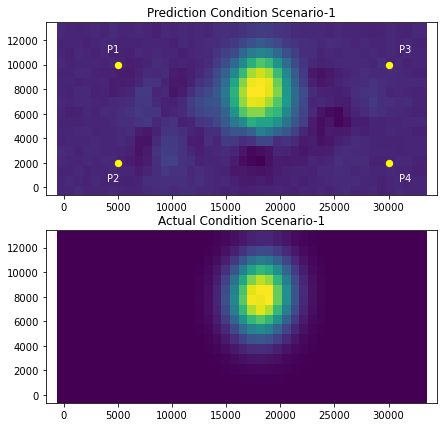

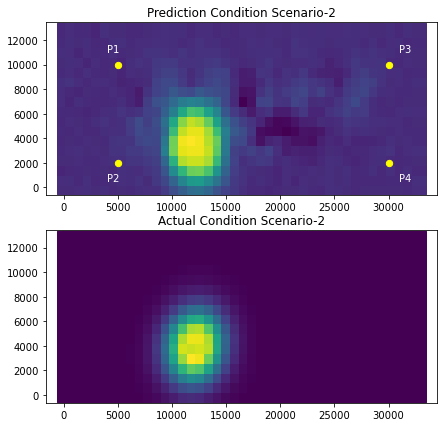

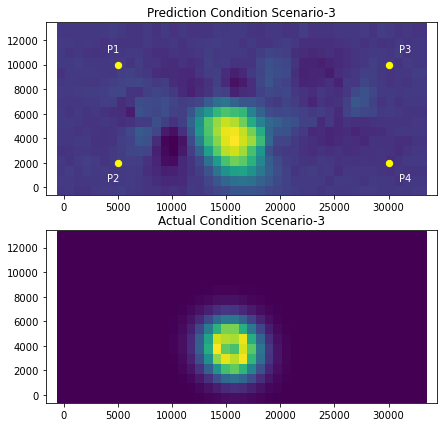

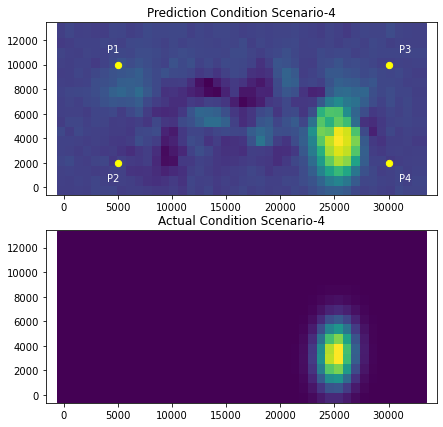

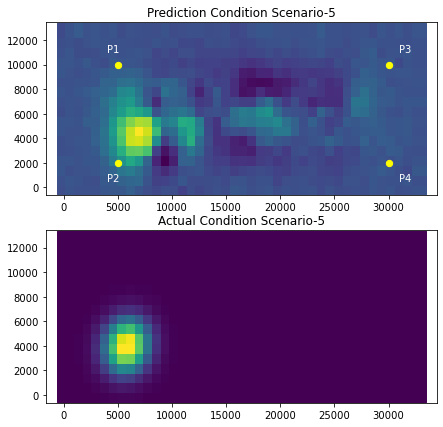

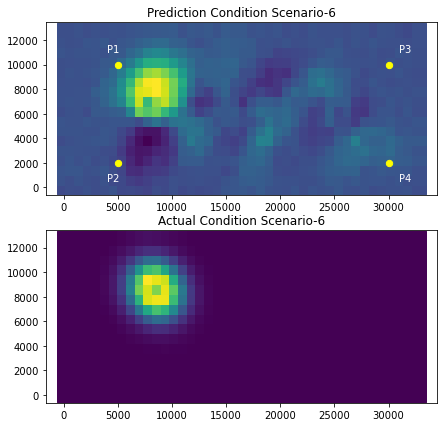

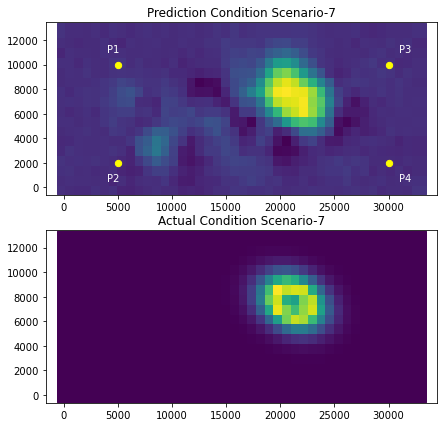

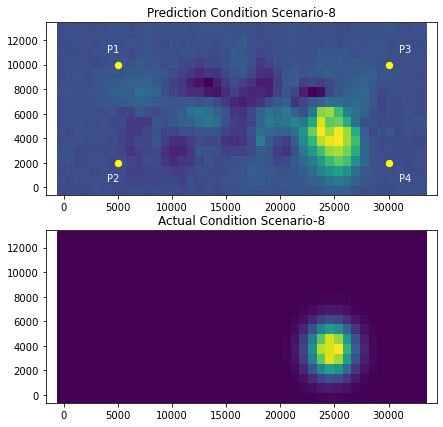

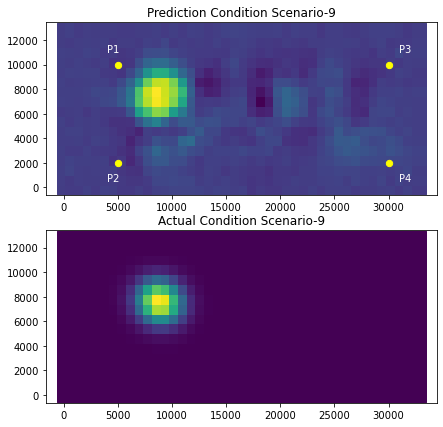

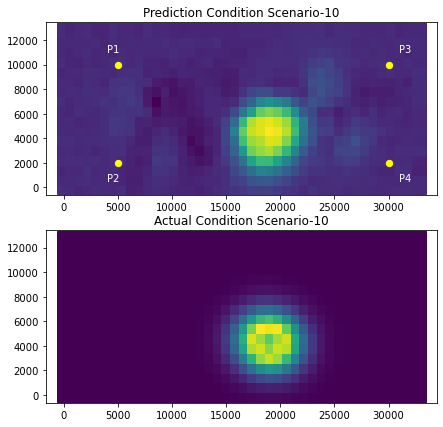

In [9]:
# PLOTTING RESULT

for i in range(10):
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
    ax1.scatter(point_target[0],point_target[1], 200, Y_predict[i], marker='s')
    ax1.set_title('Prediction Condition Scenario-%s' % (str(i+1)))
    ax1.scatter(5000,10000, 40, 'yellow')
    ax1.annotate('P1', (4000,11000), color='white')
    ax1.scatter(5000,2000, 40, 'yellow')
    ax1.annotate('P2', (4000,500), color='white')
    ax1.scatter(30000,10000, 40, 'yellow')
    ax1.annotate('P3', (31000,11000), color='white')
    ax1.scatter(30000,2000, 40, 'yellow')
    ax1.annotate('P4', (31000,500), color='white')


    ax2.scatter(point_target[0],point_target[1], 200, Y_val[i], marker='s')
    ax2.set_title('Actual Condition Scenario-%s' % (str(i+1)))

In [10]:
# TRAINING DATA USING MODEL LSTM

model, time = model_LSTM(X_train, Y_train)
print(time)

Epoch 1/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0312
Epoch 2/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0275
Epoch 3/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0265
Epoch 4/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0258
Epoch 5/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0250
Epoch 6/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0234
Epoch 7/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0218
Epoch 8/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0209
Epoch 9/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0197
Epoch 10/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0191
Epoch 11/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0183
Epoch 12/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0179
Epoch 13/1000
4/4 [==============================] - 8s 2s/st

4/4 [==============================] - 9s 2s/step - loss: 0.0021
Epoch 105/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0022
Epoch 106/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0021
Epoch 107/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0023
Epoch 108/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0022
Epoch 109/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0025
Epoch 110/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0022
Epoch 111/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0023
Epoch 112/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0023
Epoch 113/1000
4/4 [==============================] - 10s 2s/step - loss: 0.0023
Epoch 114/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0021
Epoch 115/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0022
Epoch 116/1000
4/4 [==============================] - 

4/4 [==============================] - 8s 2s/step - loss: 0.0013
Epoch 207/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 208/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 209/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0011
Epoch 210/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 211/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 212/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0011
Epoch 213/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0013
Epoch 214/1000
4/4 [==============================] - 9s 2s/step - loss: 0.0012
Epoch 215/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 216/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 217/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 218/1000
4/4 [==============================] - 8

4/4 [==============================] - 9s 2s/step - loss: 7.9157e-04
Epoch 308/1000
4/4 [==============================] - 9s 2s/step - loss: 8.2793e-04
Epoch 309/1000
4/4 [==============================] - 8s 2s/step - loss: 8.1104e-04
Epoch 310/1000
4/4 [==============================] - 9s 2s/step - loss: 7.7532e-04
Epoch 311/1000
4/4 [==============================] - 9s 2s/step - loss: 7.3197e-04
Epoch 312/1000
4/4 [==============================] - 9s 2s/step - loss: 7.4312e-04
Epoch 313/1000
4/4 [==============================] - 8s 2s/step - loss: 7.4876e-04
Epoch 314/1000
4/4 [==============================] - 8s 2s/step - loss: 7.5773e-04
Epoch 315/1000
4/4 [==============================] - 9s 2s/step - loss: 8.5572e-04
Epoch 316/1000
4/4 [==============================] - 8s 2s/step - loss: 8.6995e-04
Epoch 317/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0010
Epoch 318/1000
4/4 [==============================] - 8s 2s/step - loss: 9.8403e-04
Epoch 319/1

4/4 [==============================] - 8s 2s/step - loss: 7.4130e-04
Epoch 406/1000
4/4 [==============================] - 8s 2s/step - loss: 7.2031e-04
Epoch 407/1000
4/4 [==============================] - 8s 2s/step - loss: 7.4064e-04
Epoch 408/1000
4/4 [==============================] - 8s 2s/step - loss: 7.8472e-04
Epoch 409/1000
4/4 [==============================] - 8s 2s/step - loss: 7.7593e-04
Epoch 410/1000
4/4 [==============================] - 8s 2s/step - loss: 7.5081e-04
Epoch 411/1000
4/4 [==============================] - 8s 2s/step - loss: 7.8634e-04
Epoch 412/1000
4/4 [==============================] - 8s 2s/step - loss: 7.7652e-04
Epoch 413/1000
4/4 [==============================] - 8s 2s/step - loss: 8.9077e-04
Epoch 414/1000
4/4 [==============================] - 8s 2s/step - loss: 9.1982e-04
Epoch 415/1000
4/4 [==============================] - 8s 2s/step - loss: 9.7355e-04
Epoch 416/1000
4/4 [==============================] - 8s 2s/step - loss: 9.8604e-04
Epoch 4

Epoch 504/1000
4/4 [==============================] - 8s 2s/step - loss: 6.4153e-04
Epoch 505/1000
4/4 [==============================] - 8s 2s/step - loss: 6.4318e-04
Epoch 506/1000
4/4 [==============================] - 8s 2s/step - loss: 6.3948e-04
Epoch 507/1000
4/4 [==============================] - 8s 2s/step - loss: 6.6010e-04
Epoch 508/1000
4/4 [==============================] - 8s 2s/step - loss: 6.7917e-04
Epoch 509/1000
4/4 [==============================] - 8s 2s/step - loss: 7.2924e-04
Epoch 510/1000
4/4 [==============================] - 8s 2s/step - loss: 8.4135e-04
Epoch 511/1000
4/4 [==============================] - 8s 2s/step - loss: 9.3523e-04
Epoch 512/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011
Epoch 513/1000
4/4 [==============================] - 8s 2s/step - loss: 9.9978e-04
Epoch 514/1000
4/4 [==============================] - 8s 2s/step - loss: 9.1687e-04
Epoch 515/1000
4/4 [==============================] - 8s 2s/step - loss: 0.0011


4/4 [==============================] - 8s 2s/step - loss: 4.4926e-04
Epoch 604/1000
4/4 [==============================] - 8s 2s/step - loss: 4.6432e-04
Epoch 605/1000
4/4 [==============================] - 8s 2s/step - loss: 4.6396e-04
Epoch 606/1000
4/4 [==============================] - 8s 2s/step - loss: 4.7609e-04
Epoch 607/1000
4/4 [==============================] - 8s 2s/step - loss: 4.9105e-04
Epoch 608/1000
4/4 [==============================] - 8s 2s/step - loss: 5.1847e-04
Epoch 609/1000
4/4 [==============================] - 8s 2s/step - loss: 5.6238e-04
Epoch 610/1000
4/4 [==============================] - 8s 2s/step - loss: 5.9910e-04
Epoch 611/1000
4/4 [==============================] - 8s 2s/step - loss: 6.5907e-04
Epoch 612/1000
4/4 [==============================] - 8s 2s/step - loss: 6.6661e-04
Epoch 613/1000
4/4 [==============================] - 8s 2s/step - loss: 6.9614e-04
Epoch 614/1000
4/4 [==============================] - 8s 2s/step - loss: 6.3290e-04
Epoch 6

4/4 [==============================] - 8s 2s/step - loss: 3.8287e-04
Epoch 701/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7903e-04
Epoch 702/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8206e-04
Epoch 703/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7957e-04
Epoch 704/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8435e-04
Epoch 705/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8383e-04
Epoch 706/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9131e-04
Epoch 707/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9173e-04
Epoch 708/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0017e-04
Epoch 709/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9970e-04
Epoch 710/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0831e-04
Epoch 711/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0848e-04
Epoch 7

4/4 [==============================] - 8s 2s/step - loss: 3.6640e-04
Epoch 798/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6246e-04
Epoch 799/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6521e-04
Epoch 800/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6941e-04
Epoch 801/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7838e-04
Epoch 802/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8397e-04
Epoch 803/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9355e-04
Epoch 804/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9625e-04
Epoch 805/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0372e-04
Epoch 806/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0269e-04
Epoch 807/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0883e-04
Epoch 808/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0445e-04
Epoch 8

4/4 [==============================] - 8s 2s/step - loss: 4.0263e-04
Epoch 895/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0302e-04
Epoch 896/1000
4/4 [==============================] - 8s 2s/step - loss: 4.0312e-04
Epoch 897/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9834e-04
Epoch 898/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8992e-04
Epoch 899/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7852e-04
Epoch 900/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6962e-04
Epoch 901/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6694e-04
Epoch 902/1000
4/4 [==============================] - 9s 2s/step - loss: 3.6642e-04
Epoch 903/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7236e-04
Epoch 904/1000
4/4 [==============================] - 8s 2s/step - loss: 3.7803e-04
Epoch 905/1000
4/4 [==============================] - 8s 2s/step - loss: 3.8710e-04
Epoch 9

4/4 [==============================] - 9s 2s/step - loss: 4.0308e-04
Epoch 992/1000
4/4 [==============================] - 8s 2s/step - loss: 3.9488e-04
Epoch 993/1000
4/4 [==============================] - 9s 2s/step - loss: 3.8431e-04
Epoch 994/1000
4/4 [==============================] - 9s 2s/step - loss: 3.7576e-04
Epoch 995/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6647e-04
Epoch 996/1000
4/4 [==============================] - 8s 2s/step - loss: 3.5842e-04
Epoch 997/1000
4/4 [==============================] - 8s 2s/step - loss: 3.5026e-04
Epoch 998/1000
4/4 [==============================] - 9s 2s/step - loss: 3.5049e-04
Epoch 999/1000
4/4 [==============================] - 8s 2s/step - loss: 3.5301e-04
Epoch 1000/1000
4/4 [==============================] - 8s 2s/step - loss: 3.6319e-04
11375.343287299998


In [ ]:
PREDICTION USING MODEL LSTM

In [11]:
# PREDICT Y
Y_predict = model.predict(X_val)

In [12]:
# CHECK ERROR PREDICTION

for i in range(10):
    
    print("\t Condition Scenario-%s" % (str(i+1)))
    print("MAE value is ",mean_absolute_error(Y_val[i], Y_predict[i]))
    print("RMSE value is ",mean_squared_error(Y_val[i], Y_predict[i], squared=False))

    corr, _ = pearsonr(Y_predict[i], Y_val[i])

    print("Correlation Coefficient value is ",corr)
    print("=============================================================\n")

    

	 Condition Scenario-1
MAE value is  0.040274223020283245
RMSE value is  0.0629920260461687
Correlation Coefficient value is  0.9503918184791764

	 Condition Scenario-2
MAE value is  0.03667068964590661
RMSE value is  0.06556338413601513
Correlation Coefficient value is  0.951928149703938

	 Condition Scenario-3
MAE value is  0.029688800198312115
RMSE value is  0.04773289738695754
Correlation Coefficient value is  0.9604851310965443

	 Condition Scenario-4
MAE value is  0.03505056620191408
RMSE value is  0.08798126361277228
Correlation Coefficient value is  0.804873816330685

	 Condition Scenario-5
MAE value is  0.05212459281343851
RMSE value is  0.13242394555019557
Correlation Coefficient value is  0.5012687926337209

	 Condition Scenario-6
MAE value is  0.03858869253095567
RMSE value is  0.0882075852186295
Correlation Coefficient value is  0.8661199354363696

	 Condition Scenario-7
MAE value is  0.027120324681706387
RMSE value is  0.059640600979613184
Correlation Coefficient value is

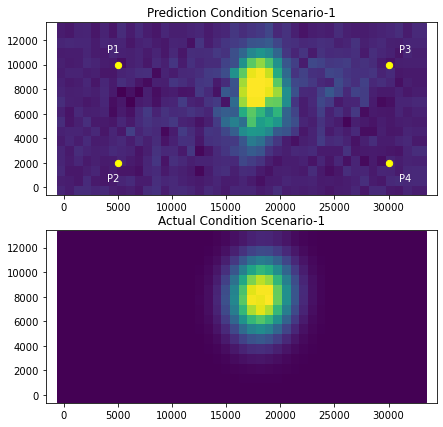

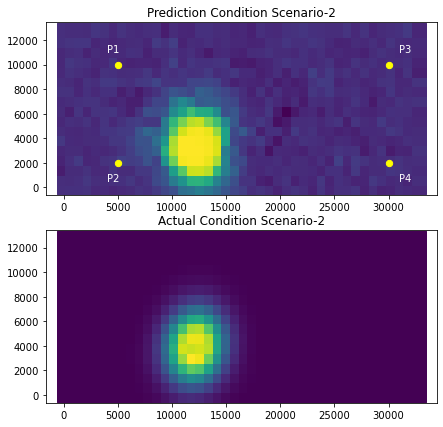

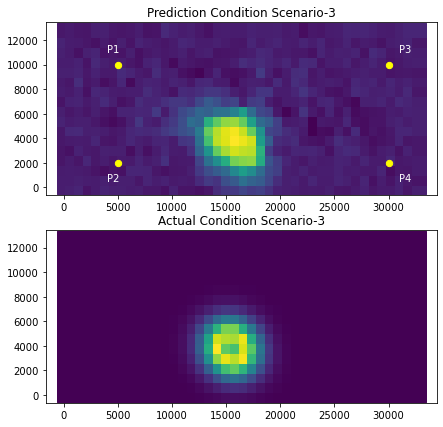

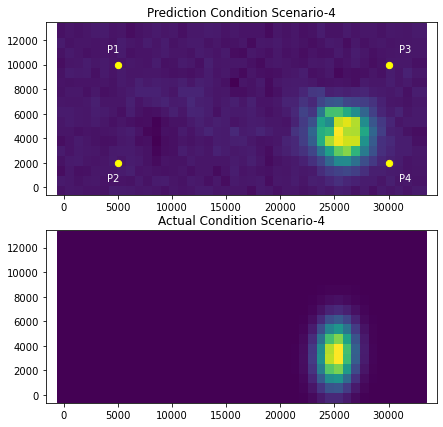

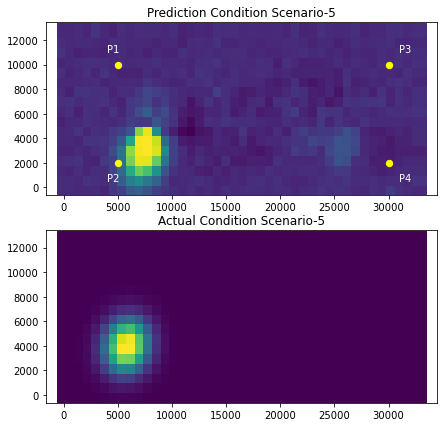

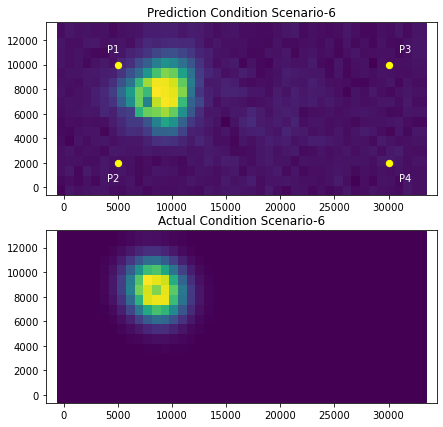

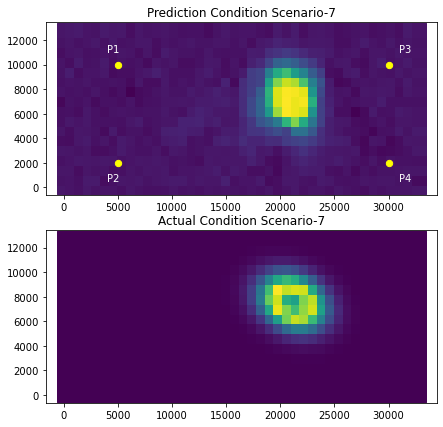

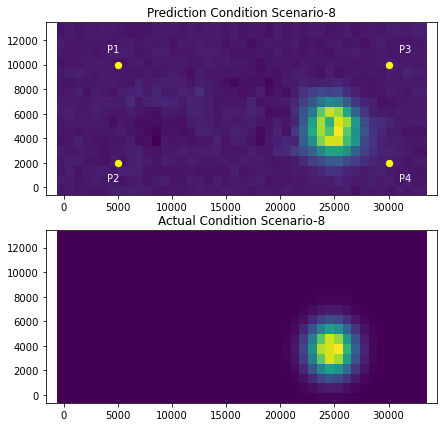

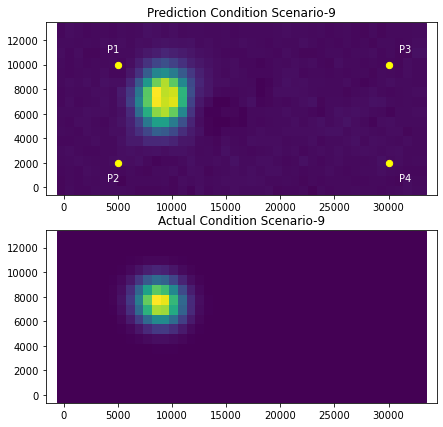

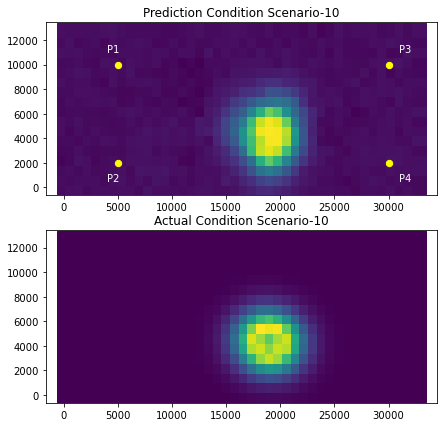

In [13]:
# PLOTTING RESULT

for i in range(10):
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
    ax1.scatter(point_target[0],point_target[1], 200, Y_predict[i], marker='s')
    ax1.set_title('Prediction Condition Scenario-%s' % (str(i+1)))
    ax1.scatter(5000,10000, 40, 'yellow')
    ax1.annotate('P1', (4000,11000), color='white')
    ax1.scatter(5000,2000, 40, 'yellow')
    ax1.annotate('P2', (4000,500), color='white')
    ax1.scatter(30000,10000, 40, 'yellow')
    ax1.annotate('P3', (31000,11000), color='white')
    ax1.scatter(30000,2000, 40, 'yellow')
    ax1.annotate('P4', (31000,500), color='white')


    ax2.scatter(point_target[0],point_target[1], 200, Y_val[i], marker='s')
    ax2.set_title('Actual Condition Scenario-%s' % (str(i+1)))